**A) without NMS**

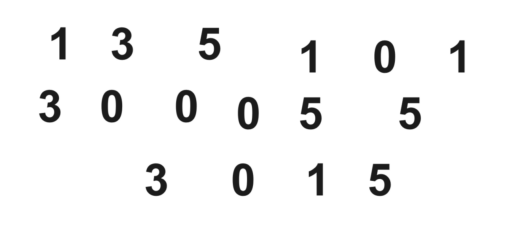

In [ ]:
import cv2
import numpy as np
from imutils.object_detection import non_max_suppression
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import imutils


# Reading the image and the template
img = cv2.imread('numbers.png')
#temp = cv2.imread('template.png')
plt.imshow(imutils.opencv2matplotlib(img))
plt.axis("off")
plt.show()

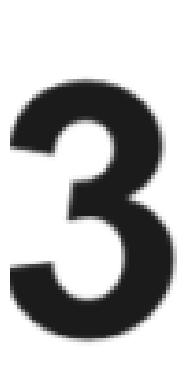

In [ ]:
## Extract the template image

temp = img[20:120, 220:265]
# template = cv2.cvtColor(template_, cv2.COLOR_BGR2GRAY)
# (tempH, tempW) = template.shape[:2]
# print("template shape",template.shape)
plt.imshow(imutils.opencv2matplotlib(temp))
plt.axis("off")
plt.show()

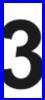

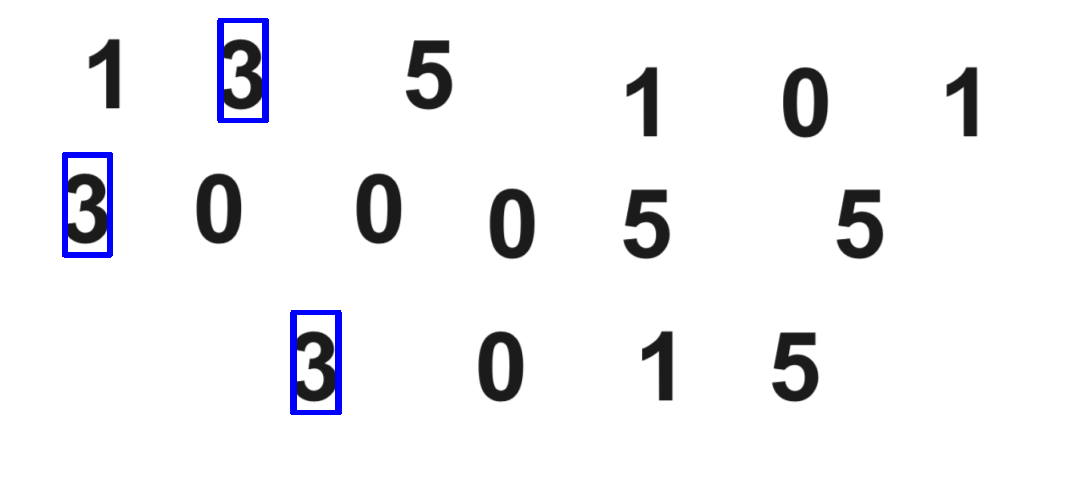

In [ ]:


# save the image dimensions
H,W = temp.shape[:2]

# Define a minimum threshold
thresh = 0.80

# Converting them to grayscale
img_gray = cv2.cvtColor(img,
						cv2.COLOR_BGR2GRAY)
temp_gray = cv2.cvtColor(temp,
						cv2.COLOR_BGR2GRAY)

# Passing the image to matchTemplate method
match = cv2.matchTemplate(
	image=img_gray, templ=temp_gray,
method=cv2.TM_CCOEFF_NORMED)

# Select rectangles with
# confidence greater than threshold
(y_points, x_points) = np.where(match >= thresh)

# initialize our list of rectangles
boxes = list()

# loop over the starting (x, y)-coordinates again
for (x, y) in zip(x_points, y_points):

	# update our list of rectangles
	boxes.append((x, y, x + W, y + H))

# apply non-maxima suppression to the rectangles
# this will create a single bounding box
# boxes = non_max_suppression(np.array(boxes))

# loop over the final bounding boxes
for (x1, y1, x2, y2) in boxes:

	# draw the bounding box on the image
	cv2.rectangle(img, (x1, y1), (x2, y2),
				(255, 0, 0), 1)

# Show the template and the final output
# cv2.imshow("Template", temp)
# cv2.imshow("After NMS", img)
# cv2.waitKey(0)

# # destroy all the windows
# # manually to be on the safe side
# cv2.destroyAllWindows()
cv2_imshow(temp)
cv2_imshow(img)

**B) With NMS**

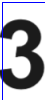

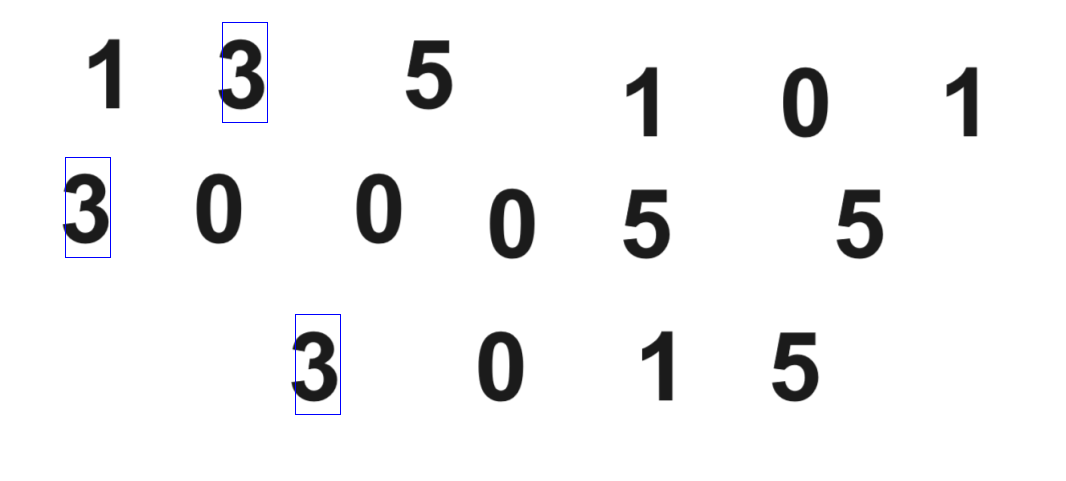

In [ ]:
import cv2
import numpy as np
from imutils.object_detection import non_max_suppression
from google.colab.patches import cv2_imshow

img = cv2.imread('numbers.png')
temp = img[20:120, 220:265]
# save the image dimensions
H,W = temp.shape[:2]

# Define a minimum threshold
thresh = 0.80

# Converting them to grayscale
img_gray = cv2.cvtColor(img,
						cv2.COLOR_BGR2GRAY)
temp_gray = cv2.cvtColor(temp,
						cv2.COLOR_BGR2GRAY)

# Passing the image to matchTemplate method
match = cv2.matchTemplate(
	image=img_gray, templ=temp_gray,
method=cv2.TM_CCOEFF_NORMED)

# Select rectangles with
# confidence greater than threshold
(y_points, x_points) = np.where(match >= thresh)

# initialize our list of rectangles
boxes = list()

# loop over the starting (x, y)-coordinates again
for (x, y) in zip(x_points, y_points):

	# update our list of rectangles
	boxes.append((x, y, x + W, y + H))

# apply non-maxima suppression to the rectangles
# this will create a single bounding box
boxes = non_max_suppression(np.array(boxes))

# loop over the final bounding boxes
for (x1, y1, x2, y2) in boxes:

	# draw the bounding box on the image
	cv2.rectangle(img, (x1, y1), (x2, y2),
				(255, 0, 0), 1)

# Show the template and the final output
# cv2.imshow("Template", temp)
# cv2.imshow("After NMS", img)
# cv2.waitKey(0)

# # destroy all the windows
# # manually to be on the safe side
# cv2.destroyAllWindows()
cv2_imshow(temp)
cv2_imshow(img)

**C) MyNMS**

In [ ]:
# import the necessary packages
import numpy as np
# Malisiewicz et al.
def My_non_max_suppression(boxes, overlapThresh):
	# if there are no boxes, return an empty list
	if len(boxes) == 0:
		return []
	# if the bounding boxes integers, convert them to floats --
	# this is important since we'll be doing a bunch of divisions
	if boxes.dtype.kind == "i":
		boxes = boxes.astype("float")
	# initialize the list of picked indexes
	pick = []
	# grab the coordinates of the bounding boxes
	x1 = boxes[:,0]
	y1 = boxes[:,1]
	x2 = boxes[:,2]
	y2 = boxes[:,3]
	# compute the area of the bounding boxes and sort the bounding
	# boxes by the bottom-right y-coordinate of the bounding box
	area = (x2 - x1 + 1) * (y2 - y1 + 1)
	idxs = np.argsort(y2)
	# keep looping while some indexes still remain in the indexes
	# list
	while len(idxs) > 0:
		# grab the last index in the indexes list and add the
		# index value to the list of picked indexes
		last = len(idxs) - 1
		i = idxs[last]
		pick.append(i)
		# find the largest (x, y) coordinates for the start of
		# the bounding box and the smallest (x, y) coordinates
		# for the end of the bounding box
		xx1 = np.maximum(x1[i], x1[idxs[:last]])
		yy1 = np.maximum(y1[i], y1[idxs[:last]])
		xx2 = np.minimum(x2[i], x2[idxs[:last]])
		yy2 = np.minimum(y2[i], y2[idxs[:last]])
		# compute the width and height of the bounding box
		w = np.maximum(0, xx2 - xx1 + 1)
		h = np.maximum(0, yy2 - yy1 + 1)
		# compute the ratio of overlap
		overlap = (w * h) / area[idxs[:last]]
		# delete all indexes from the index list that have
		idxs = np.delete(idxs, np.concatenate(([last],
			np.where(overlap > overlapThresh)[0])))
	# return only the bounding boxes that were picked using the
	# integer data type
	return boxes[pick].astype("int")

**D) Testing MyNMS with different thresholds**

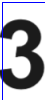

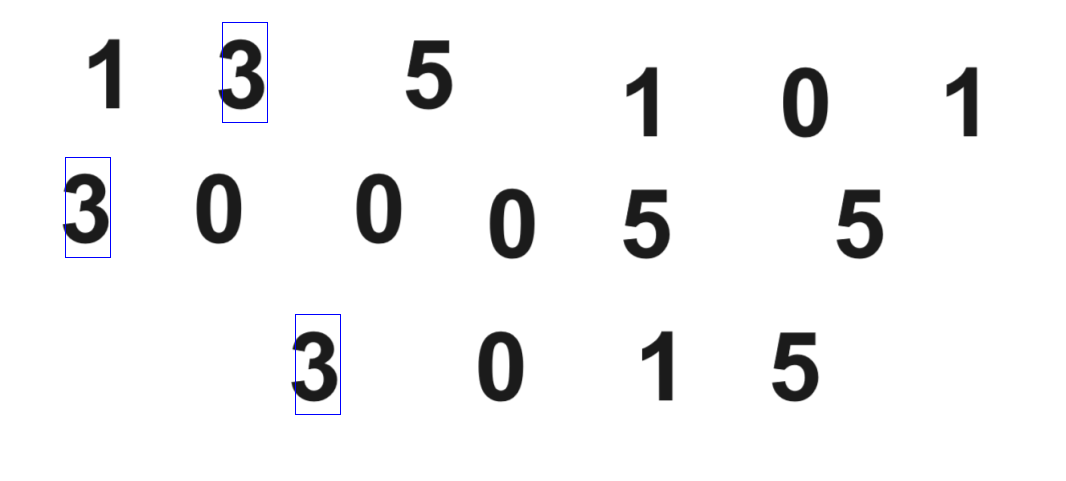

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Reading the image and the template
img = cv2.imread('numbers.png')
temp = img[20:120, 220:265]

# save the image dimensions
H,W = temp.shape[:2]

# Define a minimum threshold
thresh = 0.8

# Converting them to grayscale
img_gray = cv2.cvtColor(img,
						cv2.COLOR_BGR2GRAY)
temp_gray = cv2.cvtColor(temp,
						cv2.COLOR_BGR2GRAY)

# Passing the image to matchTemplate method
match = cv2.matchTemplate(
	image=img_gray, templ=temp_gray,
method=cv2.TM_CCOEFF_NORMED)

# Select rectangles with
# confidence greater than threshold
(y_points, x_points) = np.where(match >= thresh)

# initialize our list of rectangles
boxes = list()

# loop over the starting (x, y)-coordinates again
for (x, y) in zip(x_points, y_points):

	# update our list of rectangles
	boxes.append((x, y, x + W, y + H))

# apply non-maxima suppression to the rectangles
# this will create a single bounding box
boxes = My_non_max_suppression(np.array(boxes), 0.85)

# loop over the final bounding boxes
for (x1, y1, x2, y2) in boxes:

	# draw the bounding box on the image
	cv2.rectangle(img, (x1, y1), (x2, y2),
				(255, 0, 0), 1)

# Show the template and the final output
# cv2.imshow("Template", temp)
# cv2.imshow("After NMS", img)
# cv2.waitKey(0)

# # destroy all the windows
# # manually to be on the safe side
# cv2.destroyAllWindows()
cv2_imshow(temp)
cv2_imshow(img)